In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [15]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [16]:
def normal_scale(X):
    min_X = X.min()
    max_X = X.max()
    return (X - min_X) / (max_X - min_X)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [19]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        W -= eta * dQ + dReg
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [20]:
W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 1.81849821 -0.35874607  0.86065675  2.21999953], error 3237.0573038075286
Iter: 500, weights: [23.23552455  5.04313872 -6.82819862 19.17474317], error 39.974980749611284
Iter: 1000, weights: [27.65038261  5.92171544 -5.90289627 16.67824645], error 33.67272416112749
Iter: 1500, weights: [30.67458656  6.02837758 -4.76805326 14.95197797], error 30.404586846741733
Iter: 2000, weights: [32.83245296  6.05269008 -3.90590153 13.71854049], error 28.533624713147645
Iter: 2500, weights: [34.38118341  6.06493842 -3.28186098 12.83311574], error 27.430557342943096
Iter: 3000, weights: [35.49363474  6.07321715 -2.833088   12.1970992 ], error 26.762123546595426
Iter: 3500, weights: [36.29279774  6.07911264 -2.51064598 11.74019584], error 26.345884267284163
Iter: 4000, weights: [36.86690962  6.08334274 -2.27900115 11.41196019], error 26.0798656345564
Iter: 4500, weights: [37.2793476   6.0863811  -2.1125886  11.17615797], error 25.905792714129387
Final MSE: 25.789530443308415


In [21]:
W_list = []
reg_list = []

for reg in np.arange(0, 1, 0.05):
    print(f'reg (lambda)={reg}')
    W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=reg)
    W_list.append(W)
    reg_list.append(reg)

reg (lambda)=0.0
Iter: 0, weights: [1.52224633 0.14578524 1.24153224 1.30884715], error 3460.986604075305
Iter: 500, weights: [23.65789783  5.16831536 -6.82639995 18.98029511], error 39.28681138576552
Iter: 1000, weights: [28.37802401  6.09661066 -5.82595585 16.31081672], error 32.86696255532151
Iter: 1500, weights: [31.77924364  6.21537531 -4.54842767 14.36930213], error 29.443696731526632
Iter: 2000, weights: [34.33084893  6.24399985 -3.52883627 12.91079925], error 27.49368586981772
Iter: 2500, weights: [36.2561468   6.2592135  -2.75304986 11.81008671], error 26.381425890086938
Iter: 3000, weights: [37.71003771  6.27003187 -2.16653571 10.9788605 ], error 25.74699160234652
Iter: 3500, weights: [38.80806786  6.27813198 -1.72350822 10.3510866 ], error 25.38510942519747
Iter: 4000, weights: [39.63735218  6.2842422  -1.38890544  9.8769618 ], error 25.178691339182567
Iter: 4500, weights: [40.26366829  6.28885616 -1.13619627  9.51887952], error 25.06095018216428
Final MSE: 24.99379046605752

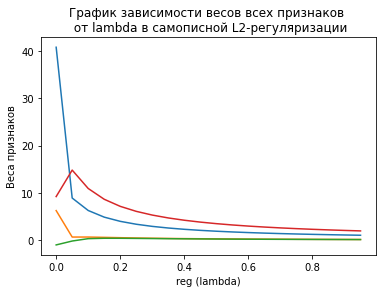

In [22]:
plt.plot(reg_list, W_list)
plt.title('График зависимости весов всех признаков \n от lambda в самописной L2-регуляризации')
#plt.xticks(np.arange(0, 101, 10))
plt.xlabel('reg (lambda)')
plt.ylabel('Веса признаков');

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [23]:
X_st = X.copy().astype(np.float64)
X_norm = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
print(X_st)

X_norm[:, 1] = normal_scale(X_st[:, 1])
X_norm[:, 2] = normal_scale(X_st[:, 2])
X_norm

[[ 1.         -0.70710678 -0.97958969  1.        ]
 [ 1.         -0.70710678 -0.56713087  1.        ]
 [ 1.         -0.35355339 -0.46401617  2.        ]
 [ 1.          0.70710678 -0.77336028  1.        ]
 [ 1.          0.          0.97958969  2.        ]
 [ 1.         -1.06066017 -0.36090146  1.        ]
 [ 1.          0.70710678  1.08270439  3.        ]
 [ 1.          2.47487373  2.11385144  3.        ]
 [ 1.         -0.70710678 -1.08270439  1.        ]
 [ 1.         -0.35355339  0.05155735  2.        ]]


array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.5       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

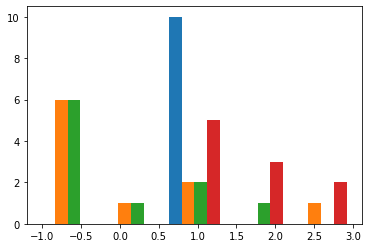

In [24]:
plt.hist(X_st, bins=5);

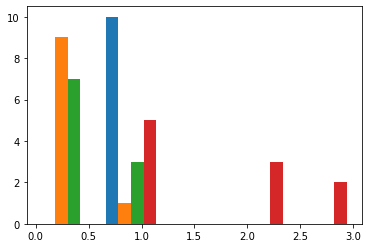

In [25]:
plt.hist(X_norm, bins=5);